# Comcast Telecom Consumer Complaints 

<b> DESCRIPTION</b>

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

<b> Data Dictionary</b>

- <b>Ticket #</b>: Ticket number assigned to each complaint
- <b>Customer Complaint</b>: Description of complaint
- <b>Date</b>: Date of complaint
- <b>Time</b>: Time of complaint
- <b>Received Via</b>: Mode of communication of the complaint
- <b>City</b>: Customer city
- <b>State</b>: Customer state
- <b>Zipcode</b>: Customer zip
- <b>Status</b>: Status of complaint
- <b>Filing on behalf of someone</b>

<b> Analysis Task</b>

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

<b> Import Libraries

In [1]:
import numpy as np
import pandas as pd

<b> Task1: Import data into Python environment

In [2]:
com_data=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
# show data
com_data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [4]:
# 5 five entries of the data
com_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
# data shape
com_data.shape

(2224, 11)

In [6]:
# data info
com_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [7]:
# column names
com_data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [8]:
# check for null values
com_data.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

<b> Task 2:  Provide the trend chart for the number of complaints at monthly and daily granularity levels

<b> Import libraries for graphs

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# convert 'Date_month_year' to datetime format
com_data['Date_month_year'] = pd.to_datetime(com_data['Date_month_year'])
com_data['Month'] =  com_data['Date_month_year'].apply(lambda x: x.month)
com_data['Day'] = com_data['Date_month_year'].apply(lambda x: x.day)
com_data['Day of Week'] = com_data['Date_month_year'].apply(lambda x: x.dayofweek)

com_data['Day of Week']=com_data['Day of Week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'})

In [11]:
com_data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Sun
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,4,Wed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,6,Fri
2221,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,6,Sun
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,23,Tue


<b> Provide the trend chart for the number of complaints at <U> monthly</U> granularity level

In [12]:
# find the month with the most complaints
month = com_data.groupby('Month')["Ticket #"].count()
print("The month with the most complaints was : ", month.idxmax()," with ",month.max())
# months: 1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'

The month with the most complaints was :  6  with  1046


Text(0.8, 0.95, 'Max complaints are in June')

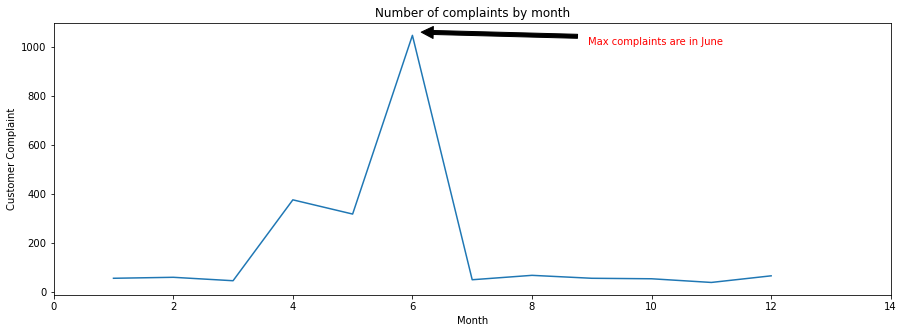

In [13]:
# trend chart for monthly complaints
plt.figure(figsize=(15,5))
month = com_data.groupby('Month').count().reset_index()
lp = sns.lineplot(x='Month', y= 'Customer Complaint', data = month)
plt.title('Number of complaints by month')
ax = lp.axes
ax.set_xlim(0,14)
ax.annotate('Max complaints are in June', color='red',
            xy=(6, 1060), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

<b> Provide the trend chart for the number of complaints at <U> daily</U> granularity level

(0.0, 35.0)

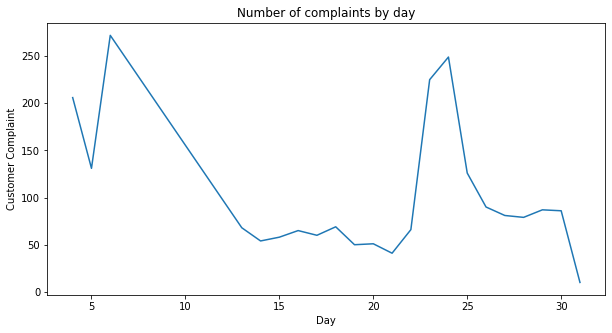

In [14]:
plt.figure(figsize=(10,5))
day = com_data.groupby('Day').count().reset_index()
lp = sns.lineplot(x='Day', y= 'Customer Complaint', data = day)
plt.title('Number of complaints by day')
ax.set_xlim(0,35)

<b> Task 3: Provide a table with the frequency of complaint types

In [15]:
ct_freq = com_data['Customer Complaint'].value_counts().to_frame().reset_index()
ct_freq

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1836,double billing after change of service,1
1837,Un able to access my email address after reloc...,1
1838,Comcast Corporation,1
1839,Complaint against Comcast Corporation,1


<b> Task 4: Find which complaint types are maximum i.e., around internet, network issues, or across any other domains

In [16]:
com_data['Customer Complaint'].value_counts().head(5)

Comcast              83
Comcast Internet     18
Comcast Data Cap     17
comcast              13
Comcast Data Caps    11
Name: Customer Complaint, dtype: int64

<b> Task 5: Create a new categorical variable with value as <U>Open</U> and <U>Closed</U>. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [17]:
com_data['Final_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in com_data["Status"]]

In [18]:
com_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,Day of Week,Final_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Wed,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Tue,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Sat,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Sun,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Tue,Closed


<b> Task 6: Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on: </b>
   * Which state has the maximum complaints
   * Which state has the highest percentage of unresolved complaints

<b> Check how many closed and open tickets there are by state

In [19]:
# final ticket status by state
com_data_state_status = pd.crosstab(com_data["State"],com_data["Final_Status"])
com_data_state_status

Final_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


<b> Find the state with the most complaints

Text(0.5, 1.0, 'State wise status of complaints')

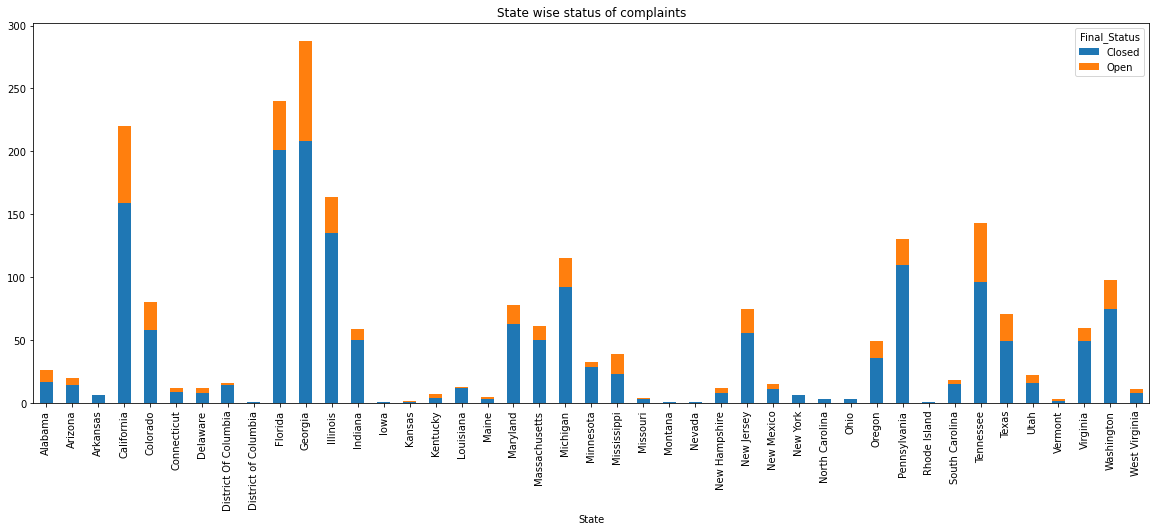

In [20]:
# state wise status of complaints in a stacked bar chart
pd.crosstab(com_data["State"],com_data["Final_Status"]).plot(kind='bar',figsize=(20,7),stacked=True)
plt.title('State wise status of complaints')

In [21]:
com_data.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaints"}, axis=1).head(1)

,Complaints
State,
Georgia,288


As we see both from the stacked plot bar and the code above, <b> Georgia</b> is the state with the most complaints.

<b> Find the state with the highest percentage of unresolved complaints

In [22]:
State_Unsolved=com_data.loc[com_data['Final_Status']=='Open',['State']].value_counts()
State_Unsolved.head(1)/State_Unsolved.sum()*100

State  
Georgia    15.473888
dtype: float64

<b> Task 7: Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [23]:
com_data[com_data['Final_Status']=='Closed'].groupby('Final_Status')['Received Via'].value_counts(normalize=True)*100

Final_Status  Received Via      
Closed        Customer Care Call    50.615114
              Internet              49.384886
Name: Received Via, dtype: float64